In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [ ]:
# Assuming the data is in a CSV file named 'placement_data.csv'
# If it's not, you'll need to create this CSV file from the image data
data = pd.read_csv('D:/MachineLearning/archive/placement.csv')

# Prepare the features (X) and target variable (y)
X = data[['cgpa', 'placement_exam_marks']]
y = data['placed']

hello world


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.54

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.54      0.56       107
           1       0.51      0.54      0.52        93

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.54      0.54      0.54       200



d:\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


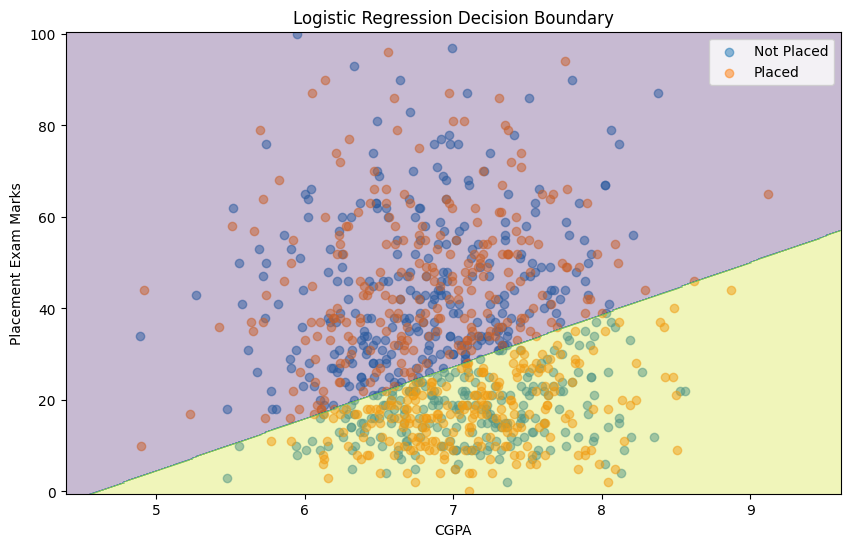


For CGPA: 7.5 and Exam Marks: 35
Predicted Placement: Not Placed
Probability of being placed: 0.50


d:\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
d:\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [11]:
# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X[y==0]['cgpa'], X[y==0]['placement_exam_marks'], label='Not Placed', alpha=0.5)
plt.scatter(X[y==1]['cgpa'], X[y==1]['placement_exam_marks'], label='Placed', alpha=0.5)

# Create a mesh to plot the decision boundary
x_min, x_max = X['cgpa'].min() - 0.5, X['cgpa'].max() + 0.5
y_min, y_max = X['placement_exam_marks'].min() - 0.5, X['placement_exam_marks'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.xlabel('CGPA')
plt.ylabel('Placement Exam Marks')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

# Function to predict placement for new data
def predict_placement(cgpa, exam_marks):
    prediction = model.predict([[cgpa, exam_marks]])
    probability = model.predict_proba([[cgpa, exam_marks]])
    return prediction[0], probability[0][1]

# Example usage
new_cgpa = 7.5
new_exam_marks = 35
prediction, probability = predict_placement(new_cgpa, new_exam_marks)
print(f"\nFor CGPA: {new_cgpa} and Exam Marks: {new_exam_marks}")
print(f"Predicted Placement: {'Placed' if prediction == 1 else 'Not Placed'}")
print(f"Probability of being placed: {probability:.2f}")